In [21]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


model = load_model('models/house_price_model.h5')

# Load the dataset
data = pd.read_csv('data/test.csv')

# Preprocess the data


In [ ]:
#Preprocess the data
from sklearn.preprocessing import LabelEncoder

df_encoded = data.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include='object'):
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le
# Normalise data   
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

test_data = df_encoded.fillna(0)
# Make predictions
predictions = model.predict(test_data)
print(predictions)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[206162.97 ]
 [ 95498.984]
 [146275.39 ]
 ...
 [225043.73 ]
 [186300.44 ]
 [217733.16 ]]


[[1461.]
 [1462.]
 [1463.]
 ...
 [2916.]
 [2917.]
 [2919.]]


<Figure size 1000x600 with 0 Axes>

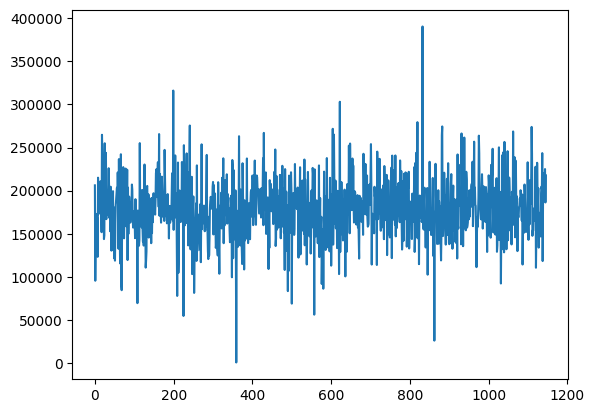

<Figure size 1000x600 with 0 Axes>

In [ ]:

# Prepare the submission file
special_data = data.dropna()

id_scaler = StandardScaler()
id_scaler.fit(data[['Id']])  # Fit on just the Id column
original_ids = id_scaler.inverse_transform(test_data[['Id']])
print(original_ids.shape(0))

output = pd.DataFrame({
    'Id': original_ids.flatten().astype(int),
    'SalePrice': predictions.flatten()
})
plt.plot(predictions)

output.to_csv('submission.csv', index=False)
# Plotting the predictions
plt.figure(figsize=(10, 6))